In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os

%run 'JPfeatures_calc.ipynb'

## Velocity

Diseased patients (the P datasets) are expected to show significantly lower velocities than the normal
patients (the J datasets). The plots generated by JvsP_velocity show exactly this. 

Note: absolute velocities are shown in the plots below.  

In [ ]:
# generates J vs. P comparisons for their velocities vs. time
def JvsP_velocity(J_data, P_data): # J_data & P_data are paths
    J = pd.read_csv(J_data)
    P = pd.read_csv(P_data)

    fig = plt.figure(num = 1, clear = True)
    ax = fig.subplots(2, 1, sharex = True, sharey = True)
    ax[0].plot(range(len(J['Timestamp'])), abs(J['Velocity']))
    ax[0].set(title = 'J Dataset Velocity vs. Time', xlabel = 'Time', ylabel = 'Velocity')
    ax[1].plot(range(len(P['Timestamp'])), abs(P['Velocity']))
    ax[1].set(title = 'P Dataset Velocity vs. Time', xlabel = 'Time', ylabel = 'Velocity')
    fig.tight_layout()
    fig.set_size_inches(7, 7, forward = True)

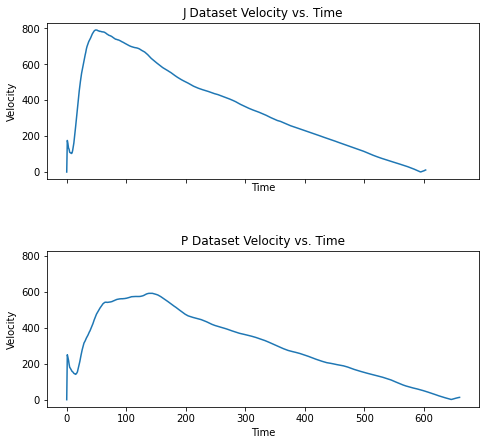

In [ ]:
# PD patients should show significantly lower mean velocity (and it does, as shown by the plots)
JvsP_velocity('/home/jovyan/work/J csv/drawing_Jay1.csv', '/home/jovyan/work/P csv/drawing_P1.csv')

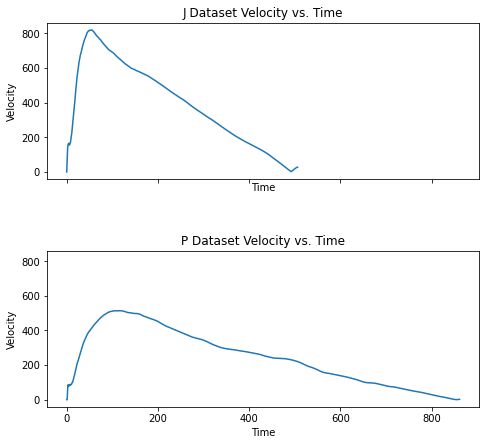

In [ ]:
JvsP_velocity('/home/jovyan/work/J csv/drawing_Jay2.csv', '/home/jovyan/work/P csv/drawing_P2.csv')

## Velocity Features

### Mean Velocity

Mean velocity of a patient's drawing is expected to be lower than that of a healthy control's. This is the 
case for our dataset, as shown in the box and whiskers plot below. 

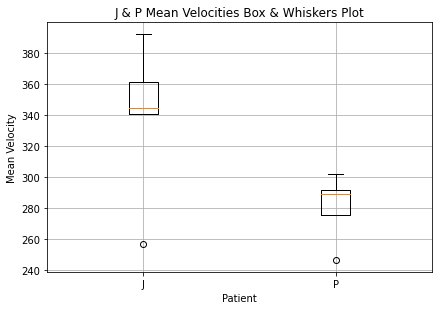

In [ ]:
def mean_velocity_graph(J_directory_path, P_directory_path): 
    J_mean_velocities = []
    P_mean_velocities = []
    for file in os.listdir(J_directory_path): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory_path, filename)

        J_mean_velocities.append(velocity_mean(path))
    
    for file in os.listdir(P_directory_path): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory_path, filename)

        P_mean_velocities.append(velocity_mean(path))

    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_mean_velocities, P_mean_velocities]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Mean Velocity', title = 'J & P Mean Velocities Box & Whiskers Plot')
    ax.grid(True)

mean_velocity_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Velocity Standard Deviation

Velocity standard deviation of a patient's drawing is expected to be higher than a healthy control's. Not 
reflected in the plot below. 

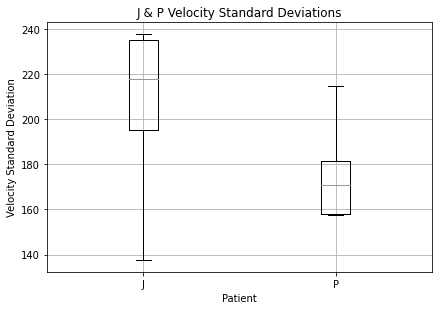

In [ ]:
def std_velocity_graph(J_directory, P_directory): 
    J_velocity_std = []
    P_velocity_std = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_velocity_std.append(velocity_std(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_velocity_std.append(velocity_std(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_velocity_std, P_velocity_std]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Velocity Standard Deviation', title = 'J & P Velocity Standard Deviations')
    ax.grid(True)

std_velocity_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Peak Velocity

Peak velocity of a patient's drawing is expected to be less than that of a healthy control's. The plot below
shows this. 

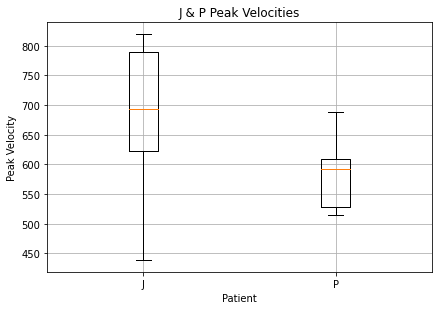

In [ ]:
def peak_velocity_graph(J_directory, P_directory): 
    J_peak_velocities = []
    P_peak_velocities = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_peak_velocities.append(velocity_max(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_peak_velocities.append(velocity_max(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_peak_velocities, P_peak_velocities]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Peak Velocity', title = 'J & P Peak Velocities')
    ax.grid(True)

peak_velocity_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Normal Velocity Variability (NVV)

NVV should be lower for smoother drawings, so the NVV for a patient's drawing is expected to be higher than 
that of a healthy control's. Not what we're seeing in the plot below. 

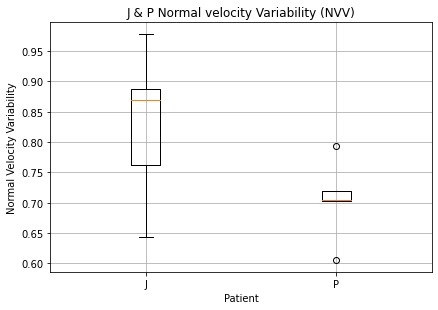

In [ ]:
def nvv_graph(J_directory, P_directory): 
    J_nvv = []
    P_nvv = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_nvv.append(velocity_nvv(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_nvv.append(velocity_nvv(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_nvv, P_nvv]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Normal Velocity Variability', title = 'J & P Normal velocity Variability (NVV)'
    )
    ax.grid(True)

nvv_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Number of Inversions in Velocity (NIV) 

This is the number of peak velocity points (local maxima). 
The ideal number of maxima for a single upstroke is 1; the greater the number of extrema, the more dysfluent
the writing. 

We expect patients to have higher NIV values than healthy controls. The plot shows this. 

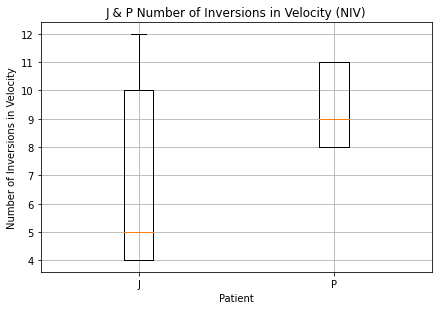

In [ ]:
def niv_graph(J_directory, P_directory): 
    J_niv = []
    P_niv = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_niv.append(velocity_niv(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_niv.append(velocity_niv(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_niv, P_niv]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Number of Inversions in Velocity', 
        title = 'J & P Number of Inversions in Velocity (NIV)'
    )
    ax.grid(True)

niv_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Acceleration

We expect the diseased patients (P datasets) to have significantly lower acceleration values, and that 
is what we are seeing from the plots. 

In [ ]:
# returns np array of the accelerations at each data point of a drawing 
def accel_calc(csv_file): 
    df = pd.read_csv(csv_file)
    accel = []
    for i in range(2, len(df['Velocity'])): 
        accel.append((df['Velocity'][i]-df['Velocity'][i-1])/(df['Timestamp'][i]-df['Timestamp'][i-1]))
    
    return np.array(accel)

In [ ]:
# generates graphs of acceleration vs. time comparing J & P datasets
def JvsP_accel(J_csv, P_csv):
    J_accel = accel_calc(J_csv)
    P_accel = accel_calc(P_csv)

    J = pd.read_csv(J_csv)
    P = pd.read_csv(P_csv)

    fig = plt.figure(num = 1, clear = True)
    ax = fig.subplots(2, 1, sharex = True, sharey = True)
    ax[0].plot(range(len(J['Timestamp']) - 2), J_accel)
    ax[0].set(title = 'J Dataset Acceleration vs. Time', xlabel = 'Time', ylabel = 'Acceleration')
    ax[1].plot(range(len(P['Timestamp']) - 2), P_accel)
    ax[1].set(title = 'P Dataset Acceleration vs. Time', xlabel = 'Time', ylabel = 'Acceleration')
    fig.tight_layout()
    fig.set_size_inches(7, 7, forward = True)

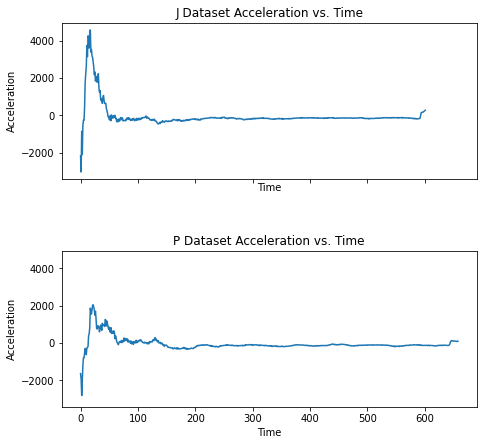

In [ ]:
# we expect the P datasets to have significantly lower acceleration, and that is what we're seeing here
JvsP_accel('/home/jovyan/work/J csv/drawing_Jay1.csv', '/home/jovyan/work/P csv/drawing_P1.csv')

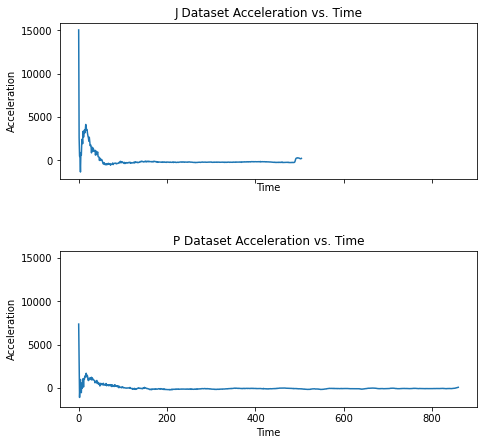

In [ ]:
# we expect the P datasets to have significantly lower acceleration, and that is what we're seeing here
JvsP_accel('/home/jovyan/work/J csv/drawing_Jay2.csv', '/home/jovyan/work/P csv/drawing_P2.csv')

## Acceleration Features

### Mean Acceleration

We expect mean acceleration of writing to be lower for diseased patients than for healthy controls. This 
is reflected in the plot. 

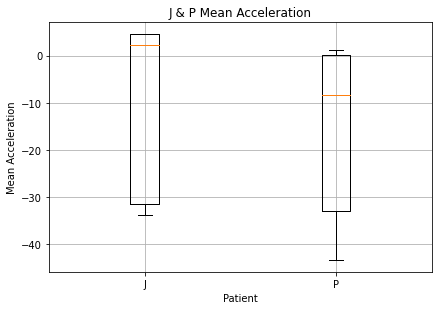

In [ ]:
def meanAccel_graph(J_directory, P_directory): 
    J_meanAccel = []
    P_meanAccel = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_meanAccel.append(accel_mean(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_meanAccel.append(accel_mean(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_meanAccel, P_meanAccel]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Mean Acceleration', title = 'J & P Mean Acceleration'
    )
    ax.grid(True)

meanAccel_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Acceleration Standard Deviation

Expect to see higher acceleration standard deviation values for patients than for healthy controls. Not 
what we see in the box plot below. 

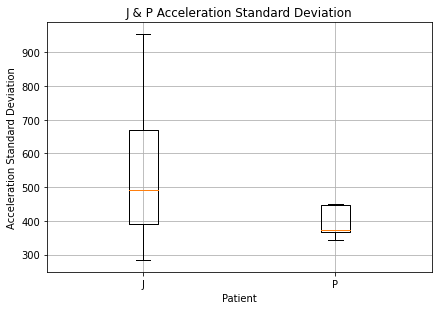

In [ ]:
def accelStd_graph(J_directory, P_directory): 
    J_accelStd = []
    P_accelStd = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_accelStd.append(accel_std(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_accelStd.append(accel_std(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_accelStd, P_accelStd]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Acceleration Standard Deviation', title = 'J & P Acceleration Standard Deviation'
    )
    ax.grid(True)

accelStd_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Max Acceleration

Max Accel of a patient's drawing is expected to be lower? than that of a healthy control's. The boxplot 
doesn't really show this (it doesn't show any difference really)

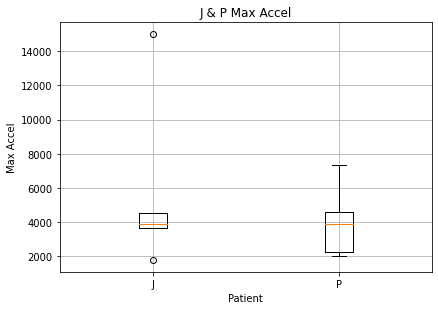

In [ ]:
def max_accel_graph(J_directory, P_directory): 
    J_max_accel = []
    P_max_accel = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_max_accel.append(accel_max(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_max_accel.append(accel_max(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_max_accel, P_max_accel]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Max Accel', title = 'J & P Max Accel')
    ax.grid(True)

max_accel_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Number of Inversions in Acceleration (NIA)

Number of Peak Acceleration Points (Local Maxima)

The ideal number of maxima for a single upstroke is 1; the greater the number of extrema, the more 
dysfluent the writing (patients should have higher values of NIA). The boxplot clearly shows this. 

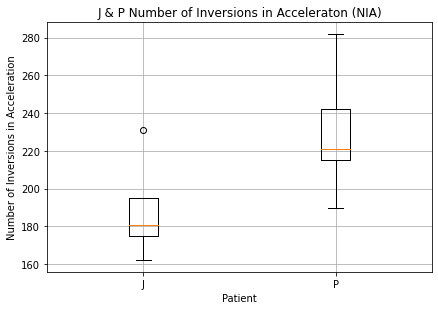

In [ ]:
def nia_graph(J_directory, P_directory): 
    J_nia = []
    P_nia = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_nia.append(accel_nia(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_nia.append(accel_nia(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_nia, P_nia]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Number of Inversions in Acceleration', 
        title = 'J & P Number of Inversions in Acceleraton (NIA)'
    )
    ax.grid(True)

nia_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Jerk

We expect diseased patients (P datasets) to show higher jerk values than the controls (J datasets). This 
difference isn't as obvious in the figures generated below. 

In [ ]:
def JvsP_jerk(J_csv, P_csv): 
    J = pd.read_csv(J_csv)
    P = pd.read_csv(P_csv)

    J_jerk = jerk_calc(J_csv)
    P_jerk = jerk_calc(P_csv)

    fig = plt.figure(num = 1, clear = True)
    ax = fig.subplots(2, 1, sharex = True, sharey = True)
    ax[0].plot(range(len(J['Timestamp']) - 52), abs(J_jerk))
    ax[0].set(title = 'J Dataset Jerk vs. Time', xlabel = 'Time', ylabel = 'Jerk')
    ax[1].plot(range(len(P['Timestamp']) - 52), abs(P_jerk))
    ax[1].set(title = 'P Dataset Jerk vs. Time', xlabel = 'Time', ylabel = 'Jerk')
    fig.tight_layout()
    fig.set_size_inches(7, 7, forward = True)

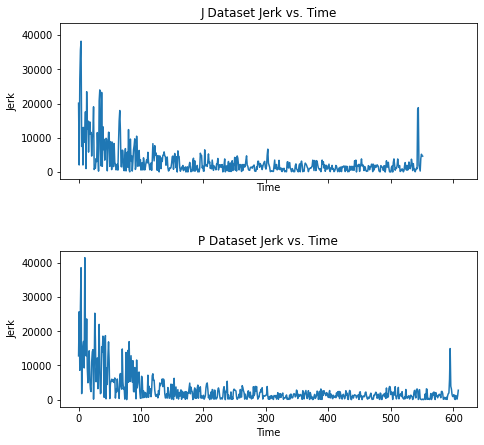

In [ ]:
JvsP_jerk('/home/jovyan/work/J csv/drawing_Jay1.csv', '/home/jovyan/work/P csv/drawing_P1.csv')

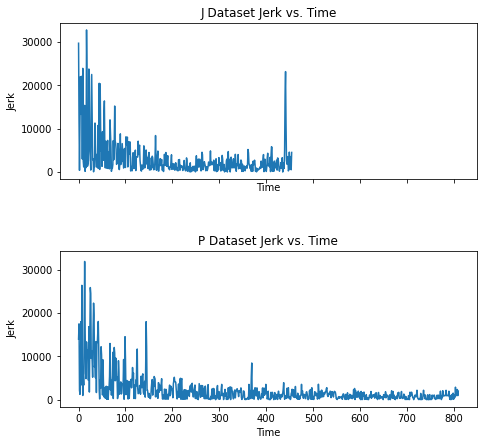

In [ ]:
JvsP_jerk('/home/jovyan/work/J csv/drawing_Jay2.csv', '/home/jovyan/work/P csv/drawing_P2.csv')

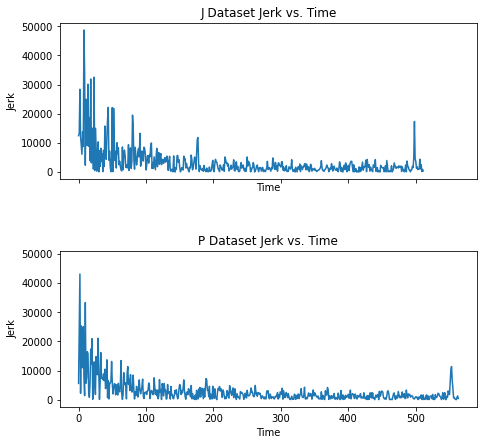

In [ ]:
JvsP_jerk('/home/jovyan/work/J csv/drawing_Jay3.csv', '/home/jovyan/work/P csv/drawing_P3.csv')

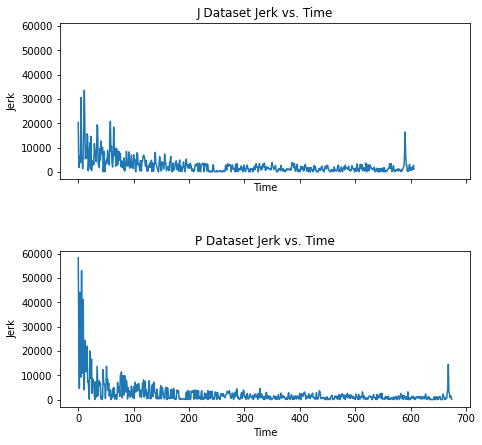

In [ ]:
JvsP_jerk('/home/jovyan/work/J csv/drawing_Jay5.csv', '/home/jovyan/work/P csv/drawing_P5.csv')

## Jerk Features

### Mean Jerk 

We expect mean jerk of writing to be higher for diseased patients than for healthy controls. This is not 
reflected in the plot. 



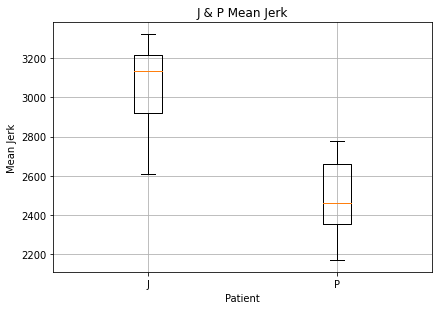

In [ ]:
def meanJerk_graph(J_directory, P_directory): 
    J_meanJerk = []
    P_meanJerk = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_meanJerk.append(jerk_mean(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_meanJerk.append(jerk_mean(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_meanJerk, P_meanJerk]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Mean Jerk', title = 'J & P Mean Jerk'
    )
    ax.grid(True)

meanJerk_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Jerk Standard Deviation

Expect to see higher jerk standard deviation values for patients than for healthy controls. This is not 
reflected in the plot. 

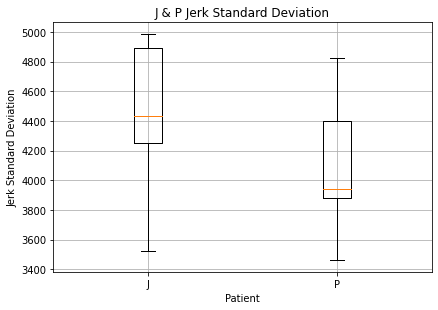

In [ ]:
def jerkStd_graph(J_directory, P_directory): 
    J_jerkStd = []
    P_jerkStd = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_jerkStd.append(jerk_std(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_jerkStd.append(jerk_std(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_jerkStd, P_jerkStd]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Jerk Standard Deviation', title = 'J & P Jerk Standard Deviation'
    )
    ax.grid(True)

jerkStd_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Max Jerk

Max Jerk of a patient's drawing is expected to be greater than that of a healthy control's. This is not 
reflected in the plot. 

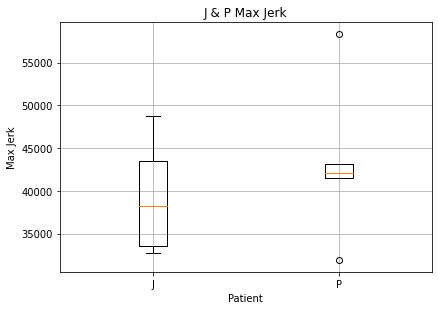

In [ ]:
def max_jerk_graph(J_directory, P_directory): 
    J_max_jerk = []
    P_max_jerk = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_max_jerk.append(jerk_max(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_max_jerk.append(jerk_max(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_max_jerk, P_max_jerk]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Max Jerk', title = 'J & P Max Jerk')
    ax.grid(True)

max_jerk_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Number of Inversions of Jerk (NIJ)

The more dysfluent the writing, the more the number of inversions of jerk. The patients are expected show higher
values of NIJs than the healthy controls. This is exactly what we're seeing in the boxplot. 

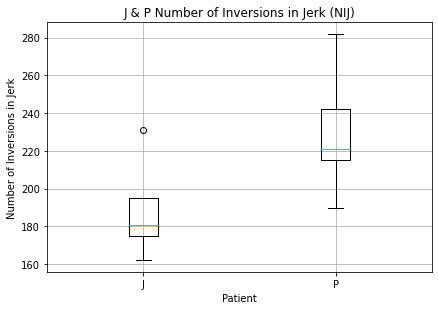

In [ ]:
def nij_graph(J_directory, P_directory): 
    J_nij = []
    P_nij = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_nij.append(accel_nia(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_nij.append(accel_nia(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_nij, P_nij]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Number of Inversions in Jerk', 
        title = 'J & P Number of Inversions in Jerk (NIJ)'
    )
    ax.grid(True)

nij_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Curvature

The curvature vs. time plots below show that the "diseased" circle drawings demonstrate more variation in the
curvature, which is what we'd expect because a perfect circle has a constant curvature. The less tremor and
the better a person's drawing is, the more "constant" its curvature. 

In [ ]:
# calculates curvature of a drawing (csv dataset)
def curvature_calc(csv_file): # where csv_file is a file pathway
    dataset = pd.read_csv(csv_file)

    # reshaping data for np.gradient
    lst = []
    for i in dataset['Coordinates']: 
        lst.append([float(i.split(',')[0]), float(i.split(',')[1])])
    
    # finding dx_dt, dy_dt, d2x_dt2, d2y_dt2
    coordinates = np.array(lst)
    dx_dt = np.gradient(coordinates[20:, 0])
    dy_dt = np.gradient(coordinates[20:, 1])
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)

    # calculate curvature using curvature formula for 2D plane curves
    curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5

    nan_values = []

    for i in curvature: 
        if m.isnan(i): 
            nan_values.append(i)

    print('Number of NaN values: {}'.format(len(nan_values)))
    
    return curvature

In [ ]:
# function that generates plots of J & P Curvature vs. Time (for comparison purposes)
def JvsP_curv(J_data, P_data): # where J_data & P_data are the csv file pathways
    J_curve = curvature_calc(J_data)
    P_curve = curvature_calc(P_data)

    J = pd.read_csv(J_data)
    P = pd.read_csv(P_data)

    fig = plt.figure(num = 1, clear = True)
    ax = fig.subplots(2, 1, sharex = True, sharey = True)
    ax[0].plot(range(len(J['Timestamp']) - 20), J_curve)
    ax[0].set(title = 'J Dataset Curvature vs. Time', ylabel = 'Curvature')
    ax[1].plot(range(len(P['Timestamp']) - 20), P_curve)
    ax[1].set(title = 'P Dataset Curvature vs. Time', ylabel = 'Curvature', xlabel = 'Time')
    fig.tight_layout()
    fig.set_size_inches(7, 7, forward = True)

Number of NaN values: 0
Number of NaN values: 0


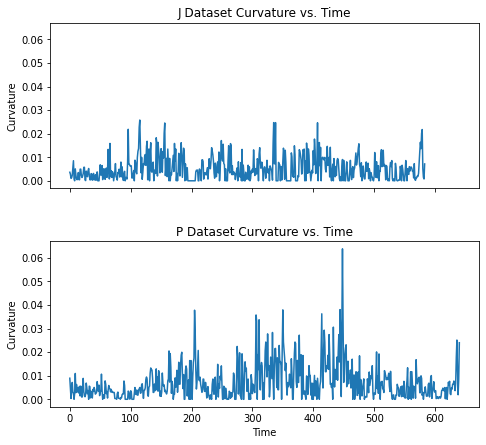

In [ ]:
JvsP_curv('/home/jovyan/work/J csv/drawing_Jay1.csv', '/home/jovyan/work/P csv/drawing_P1.csv')

Number of NaN values: 0
Number of NaN values: 0


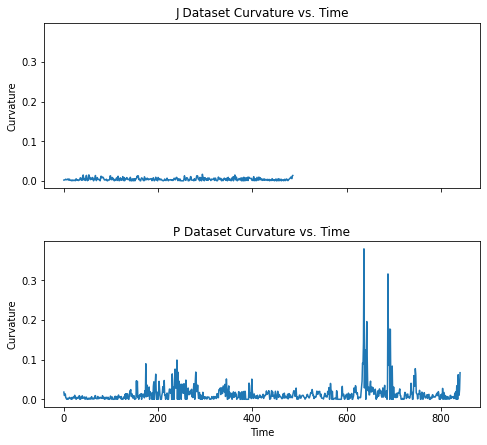

In [ ]:
JvsP_curv('/home/jovyan/work/J csv/drawing_Jay2.csv', '/home/jovyan/work/P csv/drawing_P2.csv')

## Curvature Features

### Curvature Standard Deviation

Curvature Standard Deviation of patients' drawings are expected to be greater than those of controls. This is 
shown in the plot below. 

Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0
Number of NaN values: 0


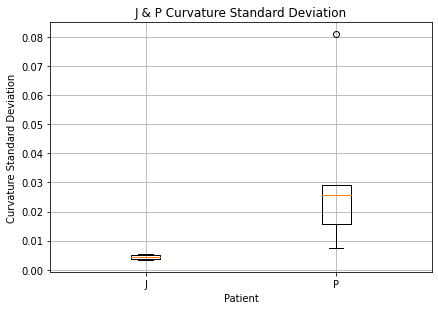

In [ ]:
def curvatureStd_graph(J_directory, P_directory): 
    J_curvatureStd = []
    P_curvatureStd = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_curvatureStd.append(curvature_std(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_curvatureStd.append(curvature_std(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_curvatureStd, P_curvatureStd]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Curvature Standard Deviation', title = 'J & P Curvature Standard Deviation'
    )
    ax.grid(True)

curvatureStd_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Displacement Features

### Total Displacement

Total displacement of the drawing is expected to be higher for diseased patients because of lack of fine motor control. 
We are seeing what we'd expect from the total displacement calculations & the plot. 

In addition to the total displacement generally being higher for diseased datasets, we are also seeing 
that the diseased datasets demonstrate less consistent total displacement values. This observation matches
the statements from the "Dynamic Handwriting Analysis..." paper, which says that AD patients' strokes have 
a less consistent length.

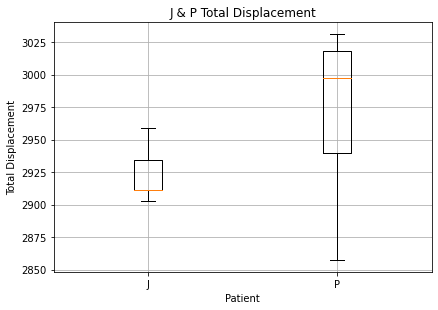

In [ ]:
def total_displacement_graph(J_directory, P_directory): 
    J_total_displacement = []
    P_total_displacement = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_total_displacement.append(total_displacement_calc(path))

    for file in os.listdir(P_directory):
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_total_displacement.append(total_displacement_calc(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_total_displacement, P_total_displacement]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Total Displacement', title = 'J & P Total Displacement')
    ax.grid(True)

total_displacement_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Duration Features

### Duration of drawing

Duration of patients' drawings are expected to be greater than those of controls. This is what we're seeing 
in the plot below. 

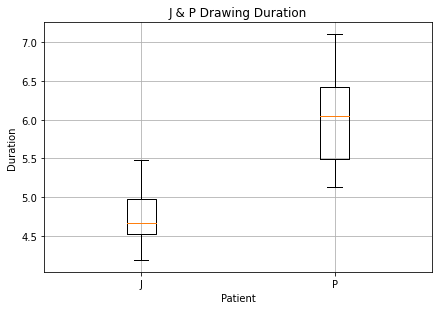

In [ ]:
def duration_graph(J_directory, P_directory): 
    J_duration = []
    P_duration = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_duration.append(duration_calc(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_duration.append(duration_calc(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_duration, P_duration]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Duration', title = 'J & P Drawing Duration'
    )
    ax.grid(True)

duration_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Force

We would expect force to be smaller for the diseased datasets, and the variability in force applied would 
is expected to be greater as well. In the following graphs, often times the force is greater 
for the diseased datasets. While this is not what we expected, I think this makes sense 
because when Jay intentionally tries to make a less perfect circle, he might "try harder" and 
apply more force (?)

Studies have also shown contradicitng results regarding how neurodegenerative conditions affect
pressure/force of handwriting. While the study done in https://academic.oup.com/psychsocgerontology/article/61/4/P228/603688 
shows that mean pressure is lower in more deteriorated groups, the study in 
"LaBarge, E., Smith, D. S., Dick, L., Storandt, M. (1992). Agraphia in dementia of the Alzheimer type. Archives of Neurology, 49,1151-1156."
shows that mild to moderate AD patients significantly increased their handwriting thickness &
pressure on the pen. 

In [ ]:
def JvsP_force(J_csv, P_csv): 
    J = pd.read_csv(J_csv)
    P = pd.read_csv(P_csv)

    fig = plt.figure(num = 1, clear = True)
    ax = fig.subplots(2, 1, sharex = True, sharey = True)
    ax[0].plot(range(len(J['Timestamp'])), J['force'])
    ax[0].set(title = 'J Dataset Force vs. Time', ylabel = 'Force')
    ax[1].plot(range(len(P['Timestamp'])), P['force'])
    ax[1].set(title = 'P Dataset Force vs. Time', ylabel = 'Force', xlabel = 'Time')
    fig.tight_layout()
    fig.set_size_inches(7, 7, forward = True)

    print('J mean force: {}'.format(np.mean(J['force'])))
    print('J force std: {}'.format(np.std(J['force'])))
    print('P mean force: {}'.format(np.mean(P['force'])))
    print('P force std: {}'.format(np.std(P['force'])))

J mean force: 0.6551172999619911
J force std: 0.2620438637800344
P mean force: 0.5430990978015894
P force std: 0.1334142638183374


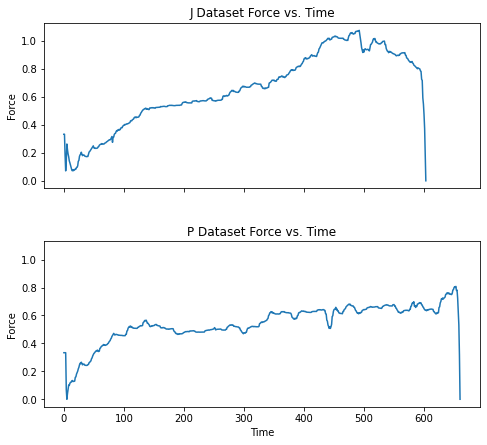

In [ ]:
JvsP_force('/home/jovyan/work/J csv/drawing_Jay1.csv', '/home/jovyan/work/P csv/drawing_P1.csv')

J mean force: 0.5738006927871454
J force std: 0.16380166374903146
P mean force: 1.2225211695931442
P force std: 0.2812598190702957


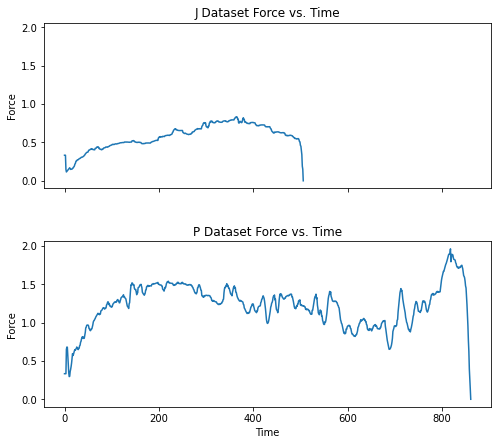

In [ ]:
JvsP_force('/home/jovyan/work/J csv/drawing_Jay2.csv', '/home/jovyan/work/P csv/drawing_P2.csv')

J mean force: 0.659402612816921
J force std: 0.22812841808965717
P mean force: 1.4429207585074686
P force std: 0.26891447615740227


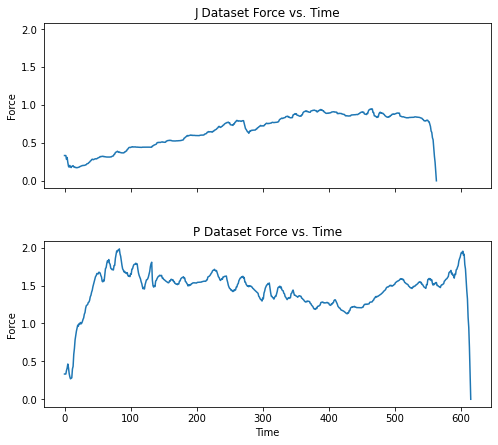

In [ ]:
JvsP_force('/home/jovyan/work/J csv/drawing_Jay3.csv', '/home/jovyan/work/P csv/drawing_P3.csv')

J mean force: 0.5024831446998022
J force std: 0.1399629121416076
P mean force: 1.7651144220994532
P force std: 0.36080906229110266


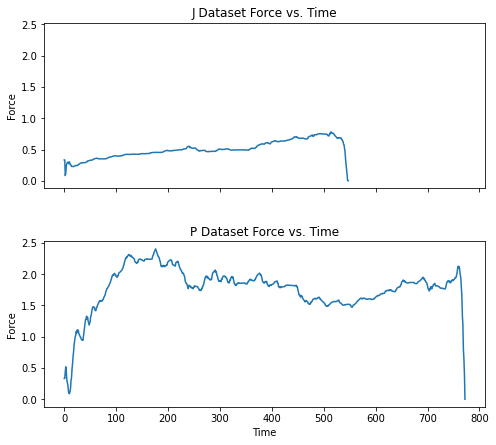

In [ ]:
JvsP_force('/home/jovyan/work/J csv/drawing_Jay4.csv', '/home/jovyan/work/P csv/drawing_P4.csv')

J mean force: 0.38021315216234247
J force std: 0.13604989833124226
P mean force: 1.3448244840822214
P force std: 0.28193389476373637


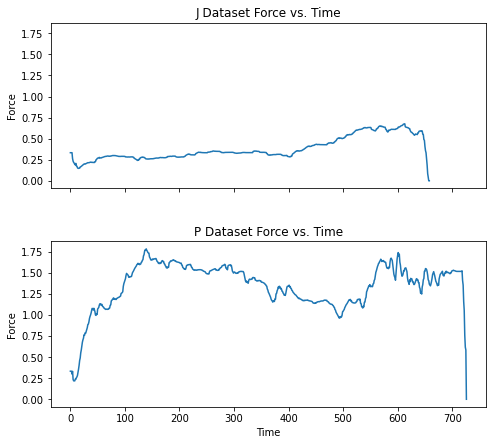

In [ ]:
JvsP_force('/home/jovyan/work/J csv/drawing_Jay5.csv', '/home/jovyan/work/P csv/drawing_P5.csv')

## Force Features

### Mean Force

Mean Force of patients' drawings are expected to be less than those of controls. We're seeing the opposite
from the plots. 

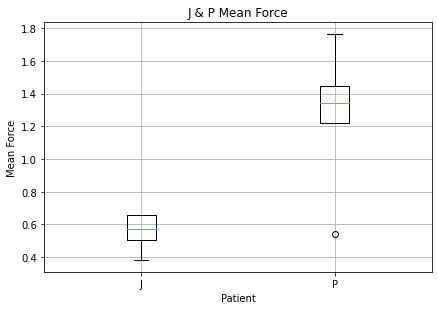

In [ ]:
def meanForce_graph(J_directory, P_directory): 
    J_meanForce = []
    P_meanForce = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_meanForce.append(force_mean(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_meanForce.append(force_mean(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_meanForce, P_meanForce]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Mean Force', title = 'J & P Mean Force'
    )
    ax.grid(True)

meanForce_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Force Standard Deviation

Expect to see higher force standard deviation values for patients than for healthy controls. This is what 
we're seeing from the plot. 

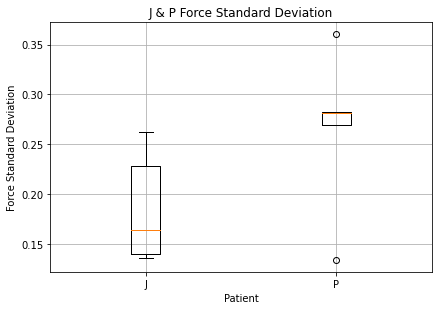

In [ ]:
def forceStd_graph(J_directory, P_directory): 
    J_forceStd = []
    P_forceStd = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_forceStd.append(force_std(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_forceStd.append(force_std(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_forceStd, P_forceStd]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(
        xlabel = 'Patient', ylabel = 'Force Standard Deviation', title = 'J & P Force Standard Deviation'
    )
    ax.grid(True)

forceStd_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

### Max Force

Expect to see lower? max force values for patients than for healthy controls. This is not reflected in the 
plot. 

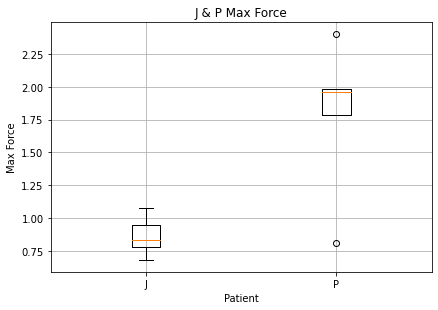

In [ ]:
def max_force_graph(J_directory, P_directory): 
    J_max_force = []
    P_max_force = []
    for file in os.listdir(J_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(J_directory, filename)
        J_max_force.append(force_max(path))

    for file in os.listdir(P_directory): 
        filename = os.fsdecode(file)
        path = os.path.join(P_directory, filename)
        P_max_force.append(force_max(path))
        
    fig = plt.figure(num = 1, clear = True)
    ax = fig.add_subplot(1, 1, 1)
    data = [J_max_force, P_max_force]
    ax.boxplot(data)
    plt.xticks([1, 2], ['J', 'P'])
    fig.tight_layout()
    ax.set(xlabel = 'Patient', ylabel = 'Max Force', title = 'J & P Max Force')
    ax.grid(True)

max_force_graph('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

## Number of Strokes Feature

Below are visualizations for J and P # of strokes data. For now, it doesn't seem like there is any difference, though this may be proven false when tested on actual patient data.

In [ ]:
def numStrokes(j_csv_dir_path, p_csv_dir_path):
    j_strokes =[]
    p_strokes = []
    index = [1,2,3,4,5]
    for file in os.listdir(j_csv_dir_path): 
        filename = os.fsdecode(file)
        path = os.path.join(j_csv_dir_path, filename)
        j_strokes.append(numStroke_calc(path))
    for file in os.listdir(p_csv_dir_path):
        filename = os.fsdecode(file)
        path = os.path.join(p_csv_dir_path, filename)
        p_strokes.append(numStroke_calc(path))
    df = pd.DataFrame({
        'J csv Number of Strokes': j_strokes,
        'P csv Number of Strokes': p_strokes
    }, index=index)
    df.plot.bar()
    return df

,J csv Number of Strokes,P csv Number of Strokes
1,1,1
2,1,1
3,1,1
4,1,1
5,1,2


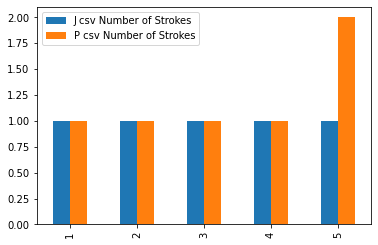

In [ ]:
numStrokes('/home/jovyan/work/J csv', '/home/jovyan/work/P csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>